In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 
from scipy import signal

In [2]:
#制御対象のパラメータを与える
K = 1 #K=1
omegan = 0.1 #ω_n=0.1
zeta = 0.2 #ζ=0.2

#制御対象の分子・分母多項式と伝達関数表現を与える
num = [0, 0, K * omegan**2] #分子多項式
den = [1, 2 * zeta * omegan, omegan**2 ] #分母多項式

#コントローラC_0の分子・分母多項式を与える
numc0 = [ 1 ] #C_{0}の分子多項式
denc0 = [ 1 ] #C_{0}の分母多項式

#コントローラC_{1}=K_pの分子・分母多項式を与える．
numc1 = [ 100 ] #C_{1}の分子多項式
denc1 = [ 1 ] #C_{1}の分母多項式

#位相遅れコントローラの分子・分母多項式を与える．
omega1 = 0.1 #位相遅れコントローラのパラメータ
numPLG = [ 1, omega1 ] #位相遅れコントローラの分子多項式
denPLG = [ 1, 0 ] #位相遅れコントローラの分母多項式

#位相進みコントローラのパラメータと分子・分母多項式を与える．
omega3 = 8 #位相進みコントローラのパラメータ
omega4 = 0.5 #位相進みコントローラのパラメータ
numPLE = [ omega3, omega3 * omega4 ] #位相進みコントローラの分子多項式
denPLE = [ omega4, omega4 * omega3 ] #位相進みコントローラの分母多項式

#制御対象とコントローラの伝達関数表現を与える
sys = matlab.tf( num, den ) #制御対象の伝達関数表現
c0 = matlab.tf( numc0, denc0 ) #C_{0}の伝達関数表現
c1 = matlab.tf( numc1, denc1 ) #C_{1}の伝達関数表現
cPLG = matlab.tf( numPLG, denPLG ) #位相遅れコントローラの伝達関数表現
cPLE = matlab.tf( numPLE, denPLE ) #位相進みコントローラの伝達関数表現

#開ループ伝達関数を求める
sysL0 = c0*sys #L_0(s) = P(s)の場合の開ループ伝達関数
sysL1 = c1*sys #L_1(s) = P(s)C_1(s)の場合の開ループ伝達関数
sysL2 = c1*cPLG*sys #L_2(s) = P(s)C_2(s)の場合の開ループ伝達関数
sysL3 = c1*cPLG*cPLE*sys #L_3(s) = P(s)C_3(s)の場合の開ループ伝達関数

In [3]:
#開ループ伝達関数L_0(s)の分子多項式と伝達関数表現を与える
[numL00, denL00] = matlab.tfdata(sysL0) #開ループ伝達関数の分子・分母多項式を抜き出す
numL0 = numL00[0][0] #分子多項式におけるPythonの配列の処理
denL0 = denL00[0][0] #分母多項式におけるPythonの配列の処理

#開ループ伝達関数L_1(s)の分子多項式と伝達関数表現を与える
[numL11, denL11] = matlab.tfdata(sysL1) #開ループ伝達関数の分子・分母多項式を抜き出す
numL1 = numL11[0][0] #分子多項式におけるPythonの配列の処理
denL1 = denL11[0][0] #分母多項式におけるPythonの配列の処理

#開ループ伝達関数L_2(s)の分子多項式と伝達関数表現を与える
[numL22, denL22] = matlab.tfdata(sysL2) #開ループ伝達関数の分子・分母多項式を抜き出す
numL2 = numL22[0][0] #分子多項式におけるPythonの配列の処理
denL2 = denL22[0][0] #分母多項式におけるPythonの配列の処理

#開ループ伝達関数L_3(s)の分子多項式と伝達関数表現を与える
[numL33, denL33] = matlab.tfdata(sysL3) #開ループ伝達関数の分子・分母多項式を抜き出す
numL3 = numL33[0][0] #分子多項式におけるPythonの配列の処理
denL3 = denL33[0][0] #分母多項式におけるPythonの配列の処理

#各コントローラに対応した開ループ伝達関数を与える
sysLG0 = signal.lti(numL0, denL0) #L_0の場合の伝達関数表現（signal.ltiの場合）
sysLG1 = signal.lti(numL1, denL1) #L_1の場合の伝達関数表現（signal.ltiの場合）
sysLG2 = signal.lti(numL2, denL2) #L_2の場合の伝達関数表現（signal.ltiの場合）
sysLG3 = signal.lti(numL3, denL3) #L_3の場合の伝達関数表現（signal.ltiの場合）

#角周波数の範囲を指定
w = np.logspace(-2, 2, 1000) #対数的に等間隔なベクトルの生成(10^{-2}から10^{2}で1000点)

図14.11のプロット

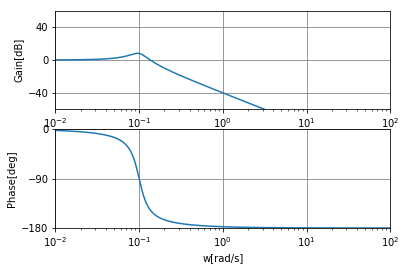

In [4]:
# ゲインと位相の計算
wL0, gainL0, phaseL0 = signal.bode(sysLG0, w) #ゲインと位相

# #図14.11のプロット
plt.subplot(2, 1, 1) #複数の図を並べるためのコマンド．2行1列の1行目という意味
plt.semilogx(wL0, gainL0) #ゲイン線図をプロット
plt.xlim([0.01,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-60,60]) #縦軸の範囲の指定
plt.yticks([-40,0,40])#縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示

# 位相線図のプロット
plt.subplot(2, 1, 2) #複数の図を縦に並べるためのコマンド．2行1列の2行目という意味
plt.semilogx(wL0, phaseL0) #位相線図をプロット
plt.xlim([0.01,100]) #横軸の範囲の指定
plt.ylim([-180,0]) #縦軸の範囲の指定
plt.yticks([-180,-90,0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸の表示
plt.ylabel("Phase[deg]") #縦軸の表示
plt.show() #グラフの表示

図14.12(a)のプロット

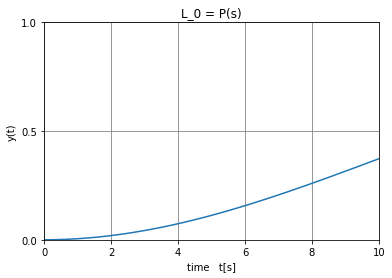

In [5]:
#L_0(s) = P(s)の場合のコントローラと制御対象のフィードバック結合を求める
sysc0 = matlab.feedback(sysL0, 1, -1) #L_0(s) = P(s)の場合のフィードバック結合

#時間変数の定義
t = arange(0, 10, 0.01) #0から10まで0.01刻み

#ステップ応答の計算
y0, t0 = matlab.step(sysc0, t) #ステップ応答

#図14.12(a)のプロット
plt.plot(t0, y0) #ステップ応答をプロット
plt.xlim([0,10]) #横軸（時間軸）の範囲の指定
plt.ylim([0,1.0]) #縦軸の範囲の指定
plt.yticks([0,0.5,1.0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("y(t)") #縦軸のラベル表示
plt.title( "L_0 = P(s)") #タイトルの表示
plt.show() #グラフの表示

図14.13のプロット

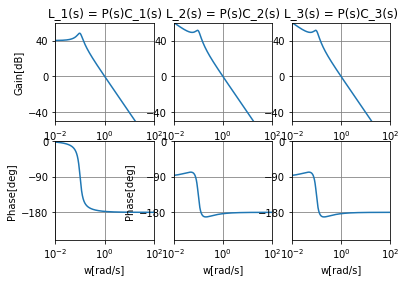

In [6]:
#図14.13(a)

#ゲインと位相の計算
wL1, gainL1, phaseL1 = signal.bode(sysLG1, w) #ゲインと位相の計算

#図14.13(a)のプロット
plt.subplot(2, 3, 1) #複数の図を並べるためのコマンド．2行3列の1行1列目という意味
plt.semilogx(wL1, gainL1) #ゲイン線図をプロット
plt.xlim([0.01,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-50,60]) #縦軸の範囲の指定
plt.yticks([-40,0,40]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("L_1(s) = P(s)C_1(s)") #タイトルの表示

plt.subplot(2, 3, 4) #複数の図を並べるためのコマンド．2行3列の2行1列目という意味
plt.semilogx(wL1, phaseL1) #位相線図をプロット
plt.xlim([0.01,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-250,0]) #縦軸の範囲の指定
plt.yticks([-180,-90,0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸のラベル表示

#図14.13(b)

#ゲインと位相の計算
wL2, gainL2, phaseL2 = signal.bode(sysLG2, w) #ゲインと位相の計算

#図14.13(b)のプロット
plt.subplot(2, 3, 2) #複数の図を並べるためのコマンド．2行3列の1行2列目という意味
plt.semilogx(wL2, gainL2) #ゲイン線図をプロット
plt.xlim([0.01,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-50,60]) #縦軸の範囲の指定
plt.yticks([-40,0,40]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
#plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("L_2(s) = P(s)C_2(s)") #タイトルの表示

plt.subplot(2, 3, 5) #複数の図を並べるためのコマンド．2行3列の2行目2列目という意味
plt.semilogx(wL2, phaseL2) #位相線図をプロット
plt.xlim([0.01,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-250,0]) #縦軸の範囲の指定
plt.yticks([-180,-90,0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸のラベル表示

#図14.13(c)

#ゲインと位相の計算
wL3, gainL3, phaseL3 = signal.bode(sysLG3, w) #ゲインと位相

#図14.13(c)のプロット
plt.subplot(2, 3, 3) #複数の図を並べるためのコマンド．2行3列の1行目3列目という意味
plt.semilogx(wL2, gainL2) #ゲイン線図をプロット
plt.xlim([0.01,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-50,60]) #縦軸の範囲の指定
plt.yticks([-40,0,40]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
#plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("L_3(s) = P(s)C_3(s)") #タイトルの表示

plt.subplot(2, 3, 6) #複数の図を並べるためのコマンド．2行3列の2行目3列目という意味
plt.semilogx(wL2, phaseL2) #位相線図をプロット
plt.xlim([0.01,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-250,0]) #縦軸の範囲の指定
plt.yticks([-180,-90,0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
#plt.ylabel("Phase[deg]") #縦軸のラベル表示
plt.show() #グラフの表示

図14.12(b)のプロット

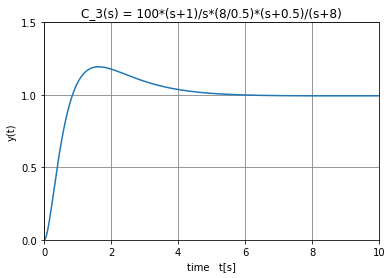

In [7]:
#L_3(s) = P(s)C_3(s)の場合のコントローラと制御対象のフィードバック結合を求める
sysc3 = matlab.feedback(sysL3, 1, -1) #L_3(s) = P(s)C_3(s)の場合のフィードバック結合

#時間変数の定義
t = arange(0, 10, 0.01) #0から10まで0.01刻み

#ステップ応答の計算
y3, t3 = matlab.step(sysc3, t) #ステップ応答

#図14.13(b)のプロット
plt.plot(t3, y3) #ステップ応答をプロット
plt.xlim([0,10]) #横軸（時間軸）の範囲の指定
plt.ylim([0,1.5]) #縦軸の範囲の指定
plt.yticks([0,0.5,1.0,1.5]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("y(t)") #縦軸のラベル表示
plt.title( "C_3(s) = 100*(s+1)/s*(8/0.5)*(s+0.5)/(s+8)") #タイトルの表示
plt.show() #グラフの表示